# Standard Wave Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
h = 1 # plank constant
m = 1 # electron mass
a = 1 # size of the well
V_0 = 0 # potential inside of the box

In [3]:
# initial conditions Psi(0) = 0 & dPsi(0) = 1
psi = 0
d_psi = 1

In [4]:
x = 0 # initial coodrinate
dx = 1e-3*a # increment to parkourir the wave function

In [5]:
E = 4.9 # Energy Potential (eigenvalue)

In [6]:
# store eigenfunction
x_list = list()
psi_list = list()

The wave function must go to zero in 0 and a according to the potential well's boundary condition. 

In [7]:
while x <= a:
  d2_psi = 2*m/h**2*(V_0-E)*psi # second derivative
  d_psi = d_psi + d2_psi * dx # first derivative
  psi = psi + d_psi *dx
  x = x + dx
  x_list.append(x)
  psi_list.append(psi)

  

Text(0.5, 1.0, 'Wave Function $\\Psi $')

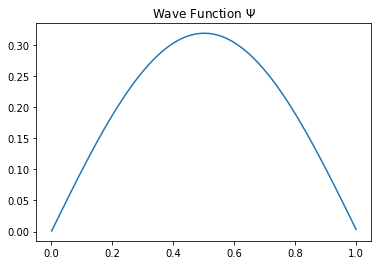

In [8]:
plt.figure()
plt.plot(x_list,psi_list)
plt.title("Wave Function " + r'$\Psi $')

We know the eigenvalue 4.9 is given by the relation n^2. Therefore, we can determine different eigenvalues.  

In [9]:
eigenvalues = [4.9 * n ** 2 for n in range(1,6)] # eigenvalues for the first five energy levels. 

In [10]:
def get_eigenfunction(E, h = 1,m = 1,a = 1,V_0 = 1,psi= 0,d_psi = 1 ,x = 0):
  dx = 1e-3 * a
  # store eigenfunction
  x_list = list()
  psi_list = list()
  while x <= a:
    d2_psi = 2*m/h**2*(V_0-E)*psi # second derivative
    d_psi = d_psi + d2_psi * dx # first derivative
    psi = psi + d_psi *dx
    x = x + dx
    x_list.append(x)
    psi_list.append(psi)
  return x_list,psi_list


In [11]:
eigenoutputs = [get_eigenfunction(eigenval) for eigenval in eigenvalues] #

In [12]:
well_range = eigenoutputs[0][0]
eigenfunctions = [eigenoutput[1] for eigenoutput in eigenoutputs]

Text(0.5, 1.0, 'Wave Functions $\\Psi $')

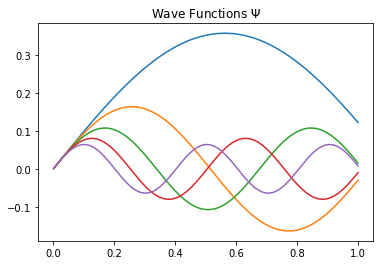

In [13]:
plt.figure()
for eigenfunction in eigenfunctions:
  plt.plot(well_range,eigenfunction)
plt.title("Wave Functions " + r'$\Psi $')

Now, we want to determine the eigenvalues and eigenfunctions without knowing the analitical result. 

In [14]:
eigenfunctions = list()
eigenenergies = list()
eigen_functions_x_list = list()


In [15]:
E = 0
dE = 0.01
dx = a * 0.001
counter = 1
nmax = 5

In [16]:
while counter <= nmax:
  psi = 1
  while abs(psi) > 0.001:
    psi = 0
    d_psi = 1
    x = 0
    E = E +dE
    x_list = list()
    psi_list = list()
    while x <= a:
      d2_psi = 2*m/h**2*(V_0-E)*psi # second derivative
      d_psi = d_psi + d2_psi * dx # first derivative
      psi = psi + d_psi *dx
      x = x + dx
      x_list.append(x)
      psi_list.append(psi)
  eigenfunctions.append([psi_list])
  eigen_functions_x_list.append([x_list])
  eigenenergies.append(E)
  counter += 1  
  E *= 1.1

In [17]:
eigenenergies

[4.929999999999939,
 19.703000000000287,
 44.333299999999475,
 78.80663000000396,
 123.127293000023]

Text(0.5, 1.0, 'Wave Functions $\\Psi $')

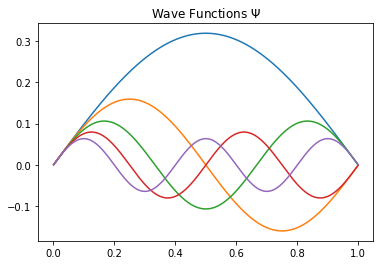

In [18]:
eigenfunctions_plot = [eigenfunct[0] for eigenfunct in eigenfunctions]
plt.figure()
for eigen in eigenfunctions_plot:
  plt.plot(x_list,eigen)
plt.title("Wave Functions " + r'$\Psi $')

We have determined the eigenfunctions and the eigen energies automatically (without asumming the analitical solution). All of the functions have the same slope at the beginning because $\Psi$ = 1 at the first position. This was enforced by code, but it is not true for a real scenario. In order to get a more accurate forecast, we must normalize the functions. 

# Normalization:

In [19]:
eigenfunctions_normalized = list()
for eigen in eigenfunctions_plot:
  norm = np.dot(eigen,eigen)*dx
  normalized = [x / np.sqrt(norm) for x in eigen]
  eigenfunctions_normalized.append(normalized)

Text(0.5, 1.0, 'Wave Functions $\\Psi $')

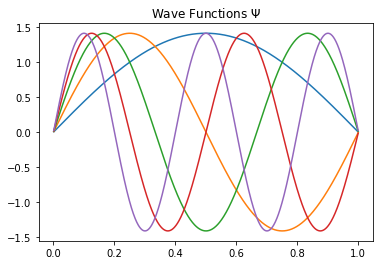

In [20]:
plt.figure()
for eigen in eigenfunctions_normalized:
  plt.plot(x_list,eigen)
plt.title("Wave Functions " + r'$\Psi $')

Note that the integration over the new functions equals 1.

In [21]:
np.dot(eigenfunctions_normalized[0],eigenfunctions_normalized[0])*dx

1.0

We can add the eigen energies to get a plot that goes according to the corresponding energy levels:

In [22]:
for i  in range(len(eigenfunctions_normalized)):
  eigenfunctions_normalized[i][:] = [x + eigenenergies[i] for x in eigen]


Text(0.5, 1.0, 'Wave Functions $\\Psi $')

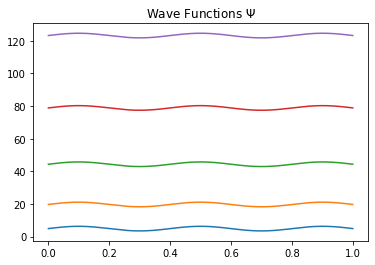

In [23]:
plt.figure()
for eigen in eigenfunctions_normalized:
  plt.plot(x_list,eigen)
plt.title("Wave Functions " + r'$\Psi $')
plt.title("Wave Functions " + r'$\Psi $')